In [2]:
import numpy as np              # load numerical module
import matplotlib.pyplot as plt # load plotting module
import astropy.io.fits as fits  # load FITS module
#import pyds9                    # load ds9 package



## What is measurement uncertainty?

- characterizes the dispersion of values that could reasonably be attributed to a measured quantity
- no measurement is exact (remember previous lectures)


## Why/how do we use it?

- Estimate the measurement uncertainty by taking sample measurements, use $\sigma$
- Compare to a priori uncertainty estimate
- If rough agreement, use sample value, otherwise find problem

### Example:

### We have observed the following values for our experiment. What is the mean and what the uncertainty in the mean? 
1. Calculate the mean both manually (e.g., using 2 appropriate Python func) and in one go using the appropriate Python func for the mean.
2. Do the same for the uncertainty


In [2]:
#dddt=np.repeat(9.81,30)+np.random.randint(-1,2,size=30)*np.random.random(30)*.08

In [3]:
observ= np.array([9.857, 9.795, 9.855, 9.792, 9.737, 9.769, 9.810, 9.810, 9.810, 9.810,
       9.874, 9.763, 9.822, 9.843, 9.848, 9.855, 9.805, 9.878, 9.851, 9.878, 9.812, 
       9.797, 9.868, 9.801, 9.753, 9.811, 9.752, 9.827, 9.814, 9.805] )

In [9]:
#mean:
# 1/N Sigma (x)
mean_man = (np.sum(observ)) / len(observ)
print("the mean is ", mean_man)

#sigma
# (1/(N-1)) * Sigma( (x-2) **2)
sig_man  = np.sqrt( np.sum((observ - mean_man)**2) / (len(observ) -1) )
print("the sigma is ", sig_man)
           
#vs the np func:
print( mean_man, np.mean(observ) )
print( sig_man, np.std(observ,ddof=1) )
                   

the mean is  9.816733333333334
the sigma is  0.03848683907011848
9.816733333333334 9.816733333333334
0.03848683907011848 0.03848683907011848


## What happens if we have a quantity that we calculate based on other things we measure?


### Think-Pair-Share (5 min)
### [e.g.,] you measure the location of a car at different times t to define its speed:
- what are the errors/uncertainties in your measurements?
- how do you calcualte the speed?
- is the speed uncertainty-less or should you have a means to calculate its uncertainty? ideas on what you should take into account?



- Eror propagation: using the errors you know ($\delta x, \delta t$) to calculate the error of the combined parameter ($\delta v$)

<br>

- Given: 
    - variables: $u$, $v$, ... observed with samples with number of draws $N_u$ , $N_v$ , ... and individual draws called $u_i$ , $v_i$ , ... <br>
    - we can calculate mean values $\bar u$, $\bar v$, ...  and 
    - standard errors $\sigma_u$ , $\sigma_v$ , ... <br>
    
    
- We know function: $f (u, v, ...)$ connecting them and **want** $\sigma_f$ <br>

1. We calculate $f (\bar u, \bar v, ...)$. 
    - This is the best estimate of $\bar f$ (would be true mean for $\infty$ measurements, but that is impossible to get...)
    - It is approximate if $\bar u, \bar v, ...$ are calculated with small $N$, approaches true for large $N$.
   
   
   
   
   

- Plot a curve, choose $\bar x$ and $\sigma_{\bar x}$ , linearize at $\bar x$, trace to $f$ axis, show $\bar f$ and $\sigma_{\bar f}$.

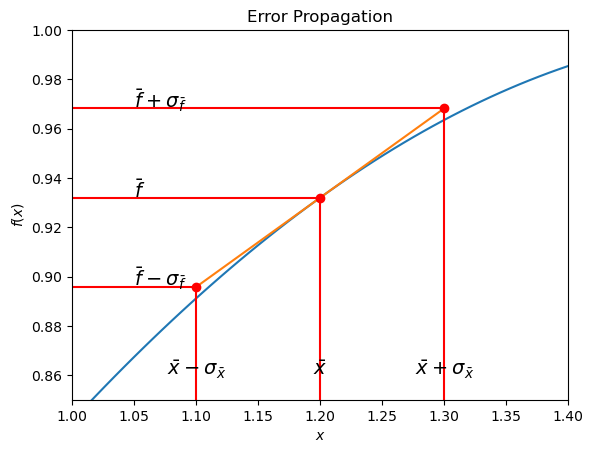

In [10]:
# Plot of error propagation (really uncertainty propagation)
#import numpy as np
#import matplotlib.pyplot as plt

N  = 100
x  = np.linspace(0.8, np.pi / 2, N)
xp = 1.2
sx = 0.1
y  = np.sin(x)     # the reality
yp = np.sin(xp)    # what we observed 
ym = np.cos(xp)    # what our model is

# Convenience function for point-slope line
def psline(x, m, yp, xp):
    return m * (x - xp) + yp

yl = psline(x, ym, yp, xp)
xs = np.array((xp - sx,
               xp + sx))
ys = psline(xs, ym, yp, xp)
sy = yp-ys[0]

# Error and value lines
lelx = np.array((xp - sx, xp - sx,     0))
lely = np.array((      0,   ys[0], ys[0]))
fulx = np.array((xp     , xp     ,     0))
fuly = np.array((      0, yp     ,    yp))
helx = np.array((xp + sx, xp + sx,     0))
hely = np.array((      0,   ys[1], ys[1]))

plt.plot(x, y)
plt.plot(xs, ys)
plt.xlim(1   , 1.4)
plt.ylim(0.85, 1  )
plt.plot(lelx, lely, "-or")
plt.plot(fulx, fuly, "-or")
plt.plot(helx, hely, "-or")
plt.text(xp - sx,  0.86  , r"$\bar x - \sigma_{\bar x}$", ha="center", size=14)
plt.text(xp     ,  0.86  , r"$\bar x$"                  , ha="center", size=14)
plt.text(xp + sx,  0.86  , r"$\bar x + \sigma_{\bar x}$", ha="center", size=14)
plt.text(1.05   , yp - sy, r"$\bar f - \sigma_{\bar f}$", ha="left", size=14)
plt.text(1.05   , yp     , r"$\bar f$"                  , ha="left", size=14)
plt.text(1.05   , yp + sy, r"$\bar f + \sigma_{\bar f}$", ha="left", size=14)
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
dm = plt.title("Error Propagation")



- If we knew the real error of our quantities $\Delta u$, $\Delta v$ etc and they were small, we could use a simple Taylor exp. and get the real error $\Delta f$
</br>
</br>
   - e.g., for car $u = \frac{s}{t}$, if we know real $\Delta s$, $\Delta t$ for obs. $u_0, t_0$: $\Delta u = u_0 + \Delta u \frac{1}{t} + \Delta t \frac{-u}{t^2} $; 
   
   </br>
   </br>
   - but if errors are big this is not enough...we need to take into account more terms incl. cross derivatives
   

- Consider the spread (variance) in values of $f_i = f(u_i , v_i , ...)$:
$$\sigma_{f}^{2} = \lim_{N\rightarrow \infty}\left[
\frac{1}{N}\sum(f_{i}-\bar f)^{2}\right]$$
   - We’re ignoring that it should be $N-m$ in denominator
       - FYI, it would be $N$ in the denominator if the mean is the real mean and not one estimated from the data. But, that rarely, if ever, happens.
   
   </br>
- We can express, like with u before, the deviation $f-f_i$ as a Taylor expansion:
$$f_{i}-\bar f \simeq (u_{i}-\bar u)\frac{\partial f}{\partial u} +
                      (v_{i}-\bar v)\frac{\partial f}{\partial v} + ...$$


- Combining these, we can get $\sigma_f^2$ in terms of $\sigma_u^2$, $\sigma_v^2$, ..., which we measured:
$$ \def\pder#1#2{\left(\frac{\partial #1}{\partial #2}\right)}
\def\sb{_}
\def\sp{^}
\begin{eqnarray}
\sigma\sb{f}\sp{2}
 & \simeq & \lim\sb{N\rightarrow \infty}\frac{1}{N}\sum
   \left[(u\sb{i}-\bar u)\frac{\partial f}{\partial u} +
         (v\sb{i}-\bar v)\frac{\partial f}{\partial v} + ...
   \right]\sp{2} \\
 & \simeq & \lim\sb{N\rightarrow \infty}\frac{1}{N}\sum
   \left[(u\sb{i}-\bar u)\sp{2}\pder{f}{u}\sp{2} +
         (v\sb{i}-\bar v)\sp{2}\pder{f}{v}\sp{2} + ...\right.\\
 &        & \hspace{1 in}  \left.2 (u\sb{i}-\bar u)(v\sb{i}-\bar v)
                    \frac{\partial f}{\partial u} \frac{\partial f}{\partial v}
              + ... \right]
\end{eqnarray}$$

Note that the first two terms are: $\sigma_u^2 = \lim_{N\rightarrow \infty}[\frac{1}{N}\Sigma(u_i-\bar u)^2] $ and $\sigma_v^2= \lim_{N\rightarrow \infty}[\frac{1}{N}\Sigma(v_i-\bar v)^2] $, and we can introduce the covariance $\sigma_{uv}^2= \lim_{N\rightarrow \infty}[\frac{1}{N}\Sigma(u_i-\bar u)(v_i-\bar v)] $ which leads us to the 


<div class="alert alert-block alert-warning">
<b> Error Propagation Equation:
$$\sigma\sb{f}\sp{2} \simeq  \sigma\sb{u}\sp{2} \pder{f}{u}\sp{2}
                         + \sigma\sb{v}\sp{2} \pder{f}{v}\sp{2}
                         + ...
                         + 2\sigma\sb{uv}\sp{2}
                            \frac{\partial f}{\partial u}
                            \frac{\partial f}{\partial v}
                         + ...$$

- If $u$ and $v$ are uncorrelated (one’s not positive when the other is, and vice versa), then ($u_i - \bar u)(v_i - \bar v)$ will be negative half the time and positive half the time, and the sum will tend to zero. So, for uncorrelated variables, we can drop the co-variance terms. In that case our eq. simplifies to:



<div class="alert alert-block alert-warning">
<b> Error Propagation Equation (uncorrelated quantities):
$$\sigma\sb{f}\sp{2} \simeq  \sigma\sb{u}\sp{2} \pder{f}{u}\sp{2}
                         + \sigma\sb{v}\sp{2} \pder{f}{v}\sp{2}
                         + ...
                         + ...$$

- Equation is important for two reasons:
    - Evaluate $\sigma_f$
    - Determine which input variables have the greatest influence on the output, and therefore
need the smallest errors.
    - Or, in other words, how should I spend my precious allotment of telescope time?

### General examples:

- if $x = \alpha u v $, with $\alpha$ a constant, what is $\sigma^2_x$?

    - $\pder{x}{u}$ = ...? = $\alpha v$
    - $\pder{x}{v}$ = ...? = $\alpha u$ 
    - Together: $\sigma^2_x = (\alpha v \sigma^2_u)^2 + (\alpha u \sigma^2_v)^2+ (2 \alpha^2 u v \sigma_{uv})^2$
    
</br>
</br>

- if $x = \frac{\alpha u}{v}$

    - $\pder{x}{u}$ = ...? = $\frac{\alpha}{v}$
    - $\pder{x}{v}$ = ...? = - $\frac{\alpha u}{v^2}$ 
    - Together: $\sigma^2_x = (\frac{\alpha}{v} \sigma^2_u)^2 + (- \frac{\alpha u}{v^2} \sigma^2_v)^2+ (2 \frac{\alpha^2 u}{v^3} \sigma_{uv})^2$
   

### 1. Think-Pair-Share (7 min):
 
### z = 3*x+ y**2

### if x = 2.0$\pm$0.2 and y =1.32$\pm$0.15 what is z$\pm$dz? Can you format your answer to have 2 decimal points?

In [14]:
x, dx = 2.0, 0.2
y, dy = 1.32, 0.15

In [21]:
#dz/dx = 3
#dz/dy = 2y

z = 3*x + y**2

par1 = 3.
par2 = 2 * y
dz = np.sqrt( (par1*dx)**2 + (par2*dy)**2 )
print('z +- dz ={0:.2f}+-{1:.2f}'.format(z, dz)) #for int use d, for exponential use e instead of f!!

z +- dz =7.74+-0.72


### Think-Pair-Share ( 15 min)
### 2. From Bev. Ch 3: example 3.3

### In an experiment to count particles emitted by a decaying radioactive source, we measure N1 = 723 counts in a 15-s time interval at the beginning of the experiment and N2 = 19 counts in a 15-s time interval later in the experiment. The events are random and obey Poisson stats. </br> Assume that we have made a very careful measurement of the background counting rate in the absence of the radioactive source and obtained a value B = 14.2 counts with negligible error for the same time interval. 
- What is the uncertainty in our measurement N1? What is it for N2?
- If the relative uncertainty is $\frac{\sigma_x}{x}$, with x the corrected number of counts (corrected for the background), what is the relative uncertainties of N1 and N2?

In [31]:
#corrected values:
N1 = 723
N2 = 19
B = 14.2
N1_corrected = N1 - B
N2_corrected = N2 - B

#poisson statistics so that we know that the uncertainties in N1 and N2 are just their square roots
uncertainty_n1 = np.sqrt( (np.sqrt(N1_corrected))**2 + (np.sqrt(N2_corrected))**2 )
print("the uncertainty of the corrected counts is ", uncertainty)

print('N1_corrected +- B ={0:.2f}+-{1:.2f}'.format(N1_corrected, B)) #for int use d, for exponential use e instead of f!!
print('N2_corrected +- B ={0:.2f}+-{1:.2f}'.format(N2_corrected, B)) #for int use d, for exponential use e instead of f!!



the uncertainty of the corrected counts is  26.7132925713024
N1_corrected +- B =708.80+-14.20
N2_corrected +- B =4.80+-14.20


### Think-Pair-Share ( 10 min)

### 3. You measure a triangle with a ruler. You make multiple measurements of its half base and its height and conclude that $h = 12.0 \pm 0.2$ and $d_{1/2} = 4.5 \pm 0.1 $. What is the surface area of the triangle? Format the print statement to correctly show your significant digits (e.g., 20.00+-0.05).

In [3]:
# we know that S = 1/2 * h * d  so:
h, h_error = 12.0, 0.2
d, d_error = 4.5, 0.1

#surface area:
s = h * d

#uncertainty:

par1 = h    #respect to d
par2 = d    #respect to h

ds = np.sqrt( (par1*d_error)**2 + (par2*h_error)**2)
print('The triangle has a surface of: {0:.2f} +- {1:.2f}'.format(s, ds))

The triangle has a surface of: 54.00 +- 1.50


### Think-Pair-Share (15 min)

### 4. In the EM lab you take two resistances $R_1 = 3.2 \pm 0.1 \Omega$ and $R_2 = 7.85 \pm 0.25 \Omega$. What is the total resistance of your circuit when connected in series ($R_{tot,s}$) and what when connected in parallel ($R_{tot,p}$) ? If we apply $I =10.2\pm 0.1 A$ to the circuit, what is the V for each case?

In [5]:
R1, R1_error = 3.2, 0.1     # Ohm
R2, R2_error = 7.85, 0.25   # Ohm
I, I_error = 10.2, 0.1      # A

# ----------------------------
# Series connection
# R_tot = R1 + R2
R_tot_s = R1 + R2
R_tot_s_error = np.sqrt(R1_error**2 + R2_error**2)

# Voltage: V = I * R_tot_s
V_s = I * R_tot_s

# Uncertainty: V = I*R, so dV = sqrt( (R*dI)^2 + (I*dR)^2 )
dV_s = np.sqrt( (R_tot_s*I_error)**2 + (I*R_tot_s_error)**2 )

print("Series: R_tot = {:.2f} ± {:.2f} Ω".format(R_tot_s, R_tot_s_error))
print("Series: V = {:.2f} ± {:.2f} V".format(V_s, dV_s))

# ----------------------------
# Parallel connection
# R_tot = 1 / (1/R1 + 1/R2)
R_tot_p = 1 / (1/R1 + 1/R2)

# Uncertainty for parallel: use partial derivatives
# dR/dR1 = (R_tot_p^2) / R1^2
# dR/dR2 = (R_tot_p^2) / R2^2
dR1_p = (R_tot_p**2) / (R1**2) * R1_error
dR2_p = (R_tot_p**2) / (R2**2) * R2_error
R_tot_p_error = np.sqrt(dR1_p**2 + dR2_p**2)

# Voltage: V = I * R_tot_p
V_p = I * R_tot_p
# Uncertainty
dV_p = np.sqrt( (R_tot_p*I_error)**2 + (I*R_tot_p_error)**2 )

print("\nParallel: R_tot = {:.2f} ± {:.2f} Ω".format(R_tot_p, R_tot_p_error))
print("Parallel: V = {:.2f} ± {:.2f} V".format(V_p, dV_p))

Series: R_tot = 11.05 ± 0.27 Ω
Series: V = 112.71 ± 2.96 V

Parallel: R_tot = 2.27 ± 0.05 Ω
Parallel: V = 23.19 ± 0.60 V


### Think-Pair-Share ( 15 min)

### 5. What is:
- $(16 \pm 8) \times (32 \pm 8 )$?

- $(20 \pm 5) \times (5 \pm 2) $ ?

- $(2.5\pm 0.5) / (3.1 \pm 0.3) $ ?

In [3]:
# 1) (16 ± 8) * (32 ± 8)
x, dx = 16, 8
y, dy = 32, 8

z = x * y
dz = np.sqrt((y * dx)**2 + (x * dy)**2)
print("(16 ± 8) * (32 ± 8) = {:.2f} ± {:.2f}".format(z, dz))

# 2) (20 ± 5) * (5 ± 2)
x, dx = 20, 5
y, dy = 5, 2

z = x * y
dz = np.sqrt((y * dx)**2 + (x * dy)**2)
print("(20 ± 5) * (5 ± 2) = {:.2f} ± {:.2f}".format(z, dz))

# 3) (2.5 ± 0.5) / (3.1 ± 0.3)
x, dx = 2.5, 0.5
y, dy = 3.1, 0.3

z = x / y
dz = np.sqrt((dx / y)**2 + (x * dy / y**2)**2)
print("(2.5 ± 0.5) / (3.1 ± 0.3) = {:.2f} ± {:.2f}".format(z, dz))

(16 ± 8) * (32 ± 8) = 512.00 ± 286.22
(20 ± 5) * (5 ± 2) = 100.00 ± 47.17
(2.5 ± 0.5) / (3.1 ± 0.3) = 0.81 ± 0.18


### (25 minutes) 

### 6. File exoplanet.eu_catalog_08_2023.csv has all exoplanet detections as of 08/28/2023 (from http://exoplanet.eu/catalog/). Use an appropriate method to read the data. Make array ***xp_mass*** and ***xp_radius*** with the masses and radii of confirmed exoplanets. Make a publication ready plot that shows the mass vs radius of exoplanets that have both quantities measured (with errors). Calculate the density for these planets (with error) and plot it vs the planet mass.

In [5]:
import pandas as pd

In [6]:
data_pd = pd.read_csv( 'exoplanet.eu_catalog_08_2023.csv' )

In [8]:
#let's filter to get rid of data that have 'nans' in mass or radius
data_pd_filt = data_pd[ data_pd[ ['mass', 'radius']].notnull().all(1) ]

In [9]:
data_pd_filt.describe

<bound method NDFrame.describe of             # name planet_status      mass  mass_error_min  mass_error_max  \
9      1RXS 1609 b     Confirmed  14.00000          3.0000          2.0000   
17    2M 0219-39 b     Confirmed  13.90000          1.1000          1.1000   
22    2M 2140+16 b     Confirmed  20.00000         20.0000         80.0000   
23    2M 2206-20 b     Confirmed  30.00000         20.0000         70.0000   
28          2M0355     Confirmed  28.00000          2.0000          2.0000   
...            ...           ...       ...             ...             ...   
5456    beta Pic b     Confirmed  11.90000          3.0400          2.9300   
5457    beta Pic c     Confirmed   8.89000          0.7500          0.7500   
5470   kappa And b     Confirmed  13.00000          2.0000         12.0000   
5485      pi Men c     Confirmed   0.01142          0.0012          0.0012   
5492   tau Boo A b     Confirmed   5.84000          0.5500          0.9900   

      mass_sini  mass_sini_er

In [10]:
xp_mass = data_pd_filt['mass']
xp_radius = data_pd_filt['radius']
xp_dmass = data_pd_filt['mass_error_max']
xp_dradius = data_pd_filt['radius_error_max']

Text(0.5, 1.0, 'Exoplanet Detections')

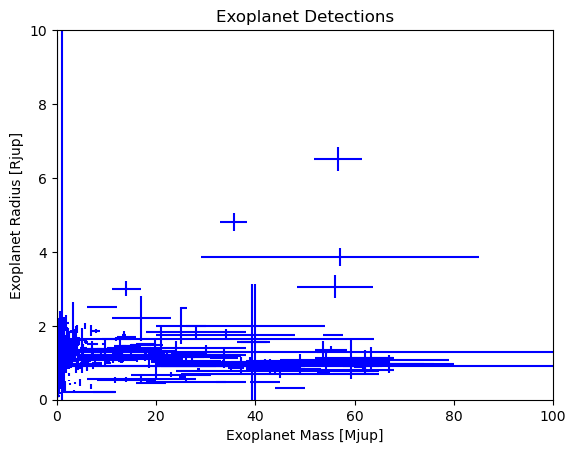

In [14]:
plt.figure()
plt.errorbar( xp_mass, xp_radius, xerr = xp_dmass, yerr = xp_dradius, color='blue', linestyle = 'none')
plt.xlim(0,100)
plt.ylim(0,10)
plt.xlabel("Exoplanet Mass [Mjup]")
plt.ylabel("Exoplanet Radius [Rjup]")
plt.title("Exoplanet Detections")

In [16]:
c1 = 6991100000 #Jupiter radius in centimeters
c2 = 1.898e30   #Jupiter mass in grams

xp_mass = xp_mass * c2
xp_dmass *= c2

xp_radius *= c1
xp_dradius *= c1

In [ ]:
#density rho = m/v = m/( (4/3)*np.pi * r**3)

In [22]:
const = (3/ (4*np.pi))
xp_rho = const * xp_mass / xp_radius **3

par1 = const / xp_radius**3
par2 = const * (-3) * (xp_mass)/ xp_dradius**4

xp_drho = np.sqrt( (par1 * xp_dmass)**2 + (par2 * xp_dradius)**2)

Text(0.5, 1.0, 'Exoplanet Detections')

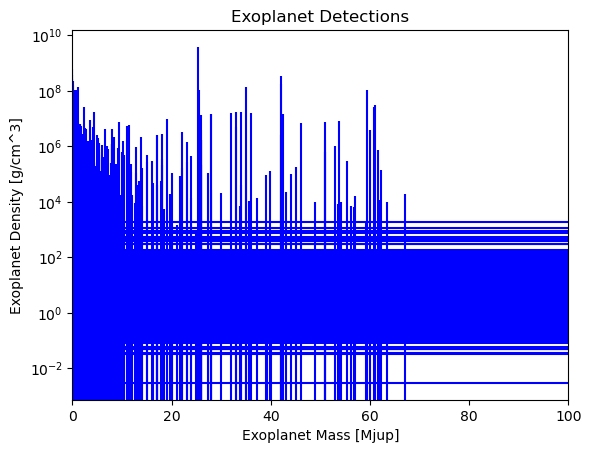

In [25]:
plt.errorbar( data_pd_filt['mass'], xp_rho, xerr = data_pd_filt['mass_error_max'], yerr = xp_drho, color='blue', linestyle = 'none')
plt.xlim(0,100)
plt.yscale('log')
plt.xlabel("Exoplanet Mass [Mjup]")
plt.ylabel("Exoplanet Density [g/cm^3]")
plt.title("Exoplanet Detections")